In [46]:
#importing libraraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st

In [47]:
# reading the dataset
nyc_data=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv",low_memory=False,parse_dates=['Created Date', 'Closed Date'])
nyc_data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [48]:
# to get number of rows and colums
nyc_data.shape

(300698, 53)

In [49]:
#to replace 'Unspecified', blanks with NaN
nyc_data.replace(["Unspecified",""],np.nan,inplace=True)
nyc_data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [50]:
nyc_data.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Landmark                                  object
Facility Type                             object
Status                                    object
Due Date            

In [51]:
# finding Request_Closing_Time
nyc_data['Request_Closing_Time']= nyc_data['Closed Date']-nyc_data['Created Date']
nyc_data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:02


In [52]:
# sort City names in ascending order
nyc_data.sort_values(by='City',ascending =True,inplace = True,  na_position ='last')
nyc_data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
188102,31043792,2015-07-11 00:25:00,2015-07-11 01:39:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11692.0,105 BEACH 61 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.589981,-73.790313,"(40.58998074407277, -73.79031328313127)",01:14:00
36387,32060971,2015-11-24 16:46:24,2015-11-24 18:07:11,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Traffic,Street/Sidewalk,11692.0,611 BEACH 63 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.597632,-73.792799,"(40.597632284913324, -73.79279910458949)",01:20:47
293989,30335122,2015-04-06 00:10:00,2015-04-06 00:44:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11692.0,136 BEACH 61 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.590263,-73.790320,"(40.59026347080242, -73.79031959642684)",00:34:00
248469,30661494,2015-05-20 06:21:47,2015-05-20 07:29:18,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,11692.0,315 BEACH 74 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.591193,-73.802303,"(40.59119324423995, -73.80230302565026)",01:07:31
100832,31611044,2015-09-25 08:12:27,2015-09-25 09:20:18,NYPD,New York City Police Department,Animal Abuse,Tortured,Residential Building/House,11692.0,342 BEACH 56 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.593574,-73.786122,"(40.59357420610759, -73.78612156933204)",01:07:51


In [53]:
nyc_data[['City','Complaint Type']]

,City,Complaint Type
188102,ARVERNE,Illegal Parking
36387,ARVERNE,Illegal Parking
293989,ARVERNE,Blocked Driveway
248469,ARVERNE,Derelict Vehicle
100832,ARVERNE,Animal Abuse
...,...,...
300273,NaN,Blocked Driveway
300492,NaN,Vending
300496,NaN,Vending
300620,NaN,Noise - Commercial


In [54]:
#to find NaN values column wise
nyc_data.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

Insights/Patterns

In [55]:

#grouping the complaint type and obtaining city wise count
data_complaints_city_count = nyc_data.groupby('Complaint Type').City.value_counts()
data_complaints_city_count

Complaint Type  City               
Animal Abuse    BROOKLYN               2394
                NEW YORK               1525
                BRONX                  1415
                STATEN ISLAND           557
                JAMAICA                 229
                                       ... 
Vending         FRESH MEADOWS             1
                KEW GARDENS               1
                OZONE PARK                1
                SPRINGFIELD GARDENS       1
                WHITESTONE                1
Name: City, Length: 764, dtype: int64

In [56]:

#grouping complaint type and getting total count considering valid city names
complaints_count = nyc_data.groupby('Complaint Type').City.count()
complaints_count

Complaint Type
Agency Issues                    0
Animal Abuse                  7767
Animal in a Park                 1
Bike/Roller/Skate Chronic      422
Blocked Driveway             76761
Derelict Vehicle             17547
Disorderly Youth               286
Drinking                      1272
Ferry Complaint                  0
Graffiti                       113
Homeless Encampment           4415
Illegal Fireworks              168
Illegal Parking              74318
Noise - Commercial           35200
Noise - House of Worship       929
Noise - Park                  4016
Noise - Street/Sidewalk      48000
Noise - Vehicle              17029
Panhandling                    305
Posting Advertisement          649
Squeegee                         4
Traffic                       4495
Urinating in Public            592
Vending                       3795
Name: City, dtype: int64

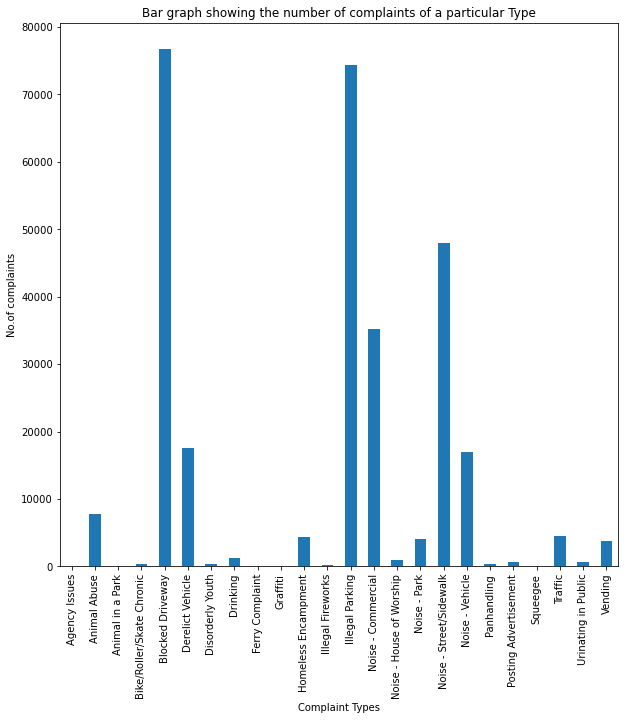

In [57]:
#number of complaints of a particular type

x=nyc_data.groupby('Complaint Type').City.count()
x.plot(kind='bar',alpha=1,figsize=(10,10))
plt.xlabel("Complaint Types")
plt.ylabel("No.of complaints")
plt.title("Bar graph showing the number of complaints of a particular Type")
plt.show()

In [58]:
#to get status counts
status_count= nyc_data.Status.value_counts()
status_count

Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64

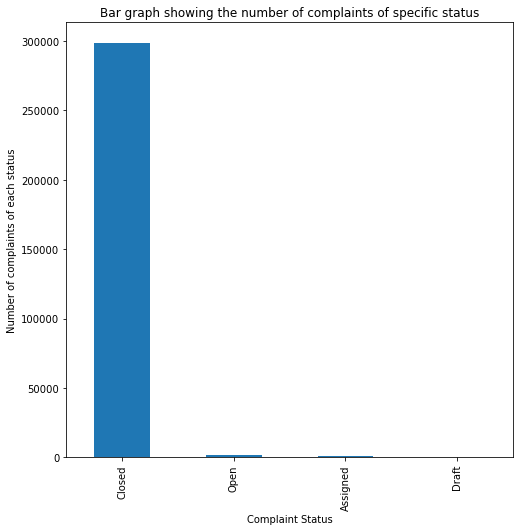

In [59]:
#plot showing the number of complaints of specific status
status_count.plot(kind='bar',alpha=1,figsize=(8,8))
plt.xlabel("Complaint Status")
plt.ylabel("Number of complaints of each status")
plt.title("Bar graph showing the number of complaints of specific status")
plt.show()

In [60]:
# Count of Complaints based on type
Complaint_valcount=nyc_data['Complaint Type'].value_counts()
Complaint_valcount

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

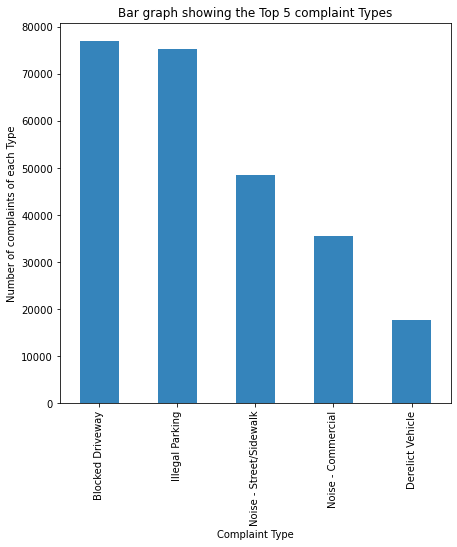

In [61]:
#plot showing top five complaints
complaint_type_top5= Complaint_valcount.head()
complaint_type_top5.plot(kind='bar',alpha=0.9,figsize=(7,7))
plt.xlabel("Complaint Type")
plt.ylabel("Number of complaints of each Type")
plt.title("Bar graph showing the Top 5 complaint Types")
plt.show()

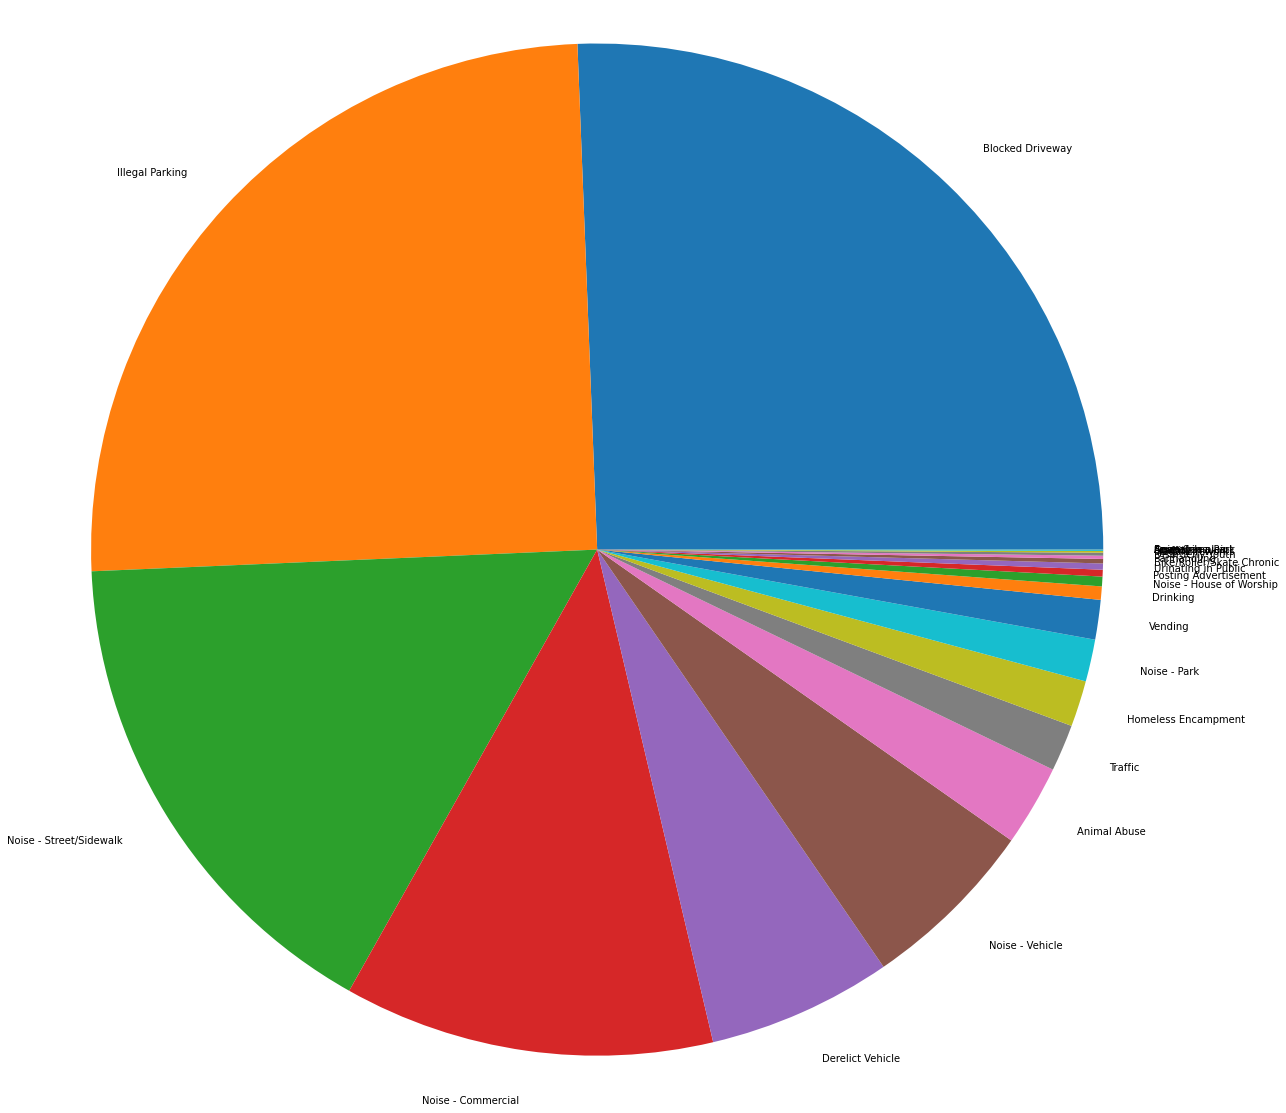

In [62]:
# Pie chart of Different compalints.
plt.figure(figsize=(20,20))
labels = Complaint_valcount.keys()
sizes = Complaint_valcount
plt.pie(sizes,labels=labels,shadow=False) 
plt.axis('equal')
plt.show()

In [63]:
# Count of complaints registered based on city 
City_count=nyc_data['City'].value_counts()
City_count

BROOKLYN               98307
NEW YORK               65994
BRONX                  40702
STATEN ISLAND          12343
JAMAICA                 7296
ASTORIA                 6330
FLUSHING                5971
RIDGEWOOD               5163
CORONA                  4295
WOODSIDE                3544
SOUTH RICHMOND HILL     2774
OZONE PARK              2755
EAST ELMHURST           2734
ELMHURST                2673
WOODHAVEN               2464
MASPETH                 2462
LONG ISLAND CITY        2437
SOUTH OZONE PARK        2173
RICHMOND HILL           1904
FRESH MEADOWS           1899
QUEENS VILLAGE          1814
MIDDLE VILLAGE          1765
JACKSON HEIGHTS         1689
FOREST HILLS            1688
REGO PARK               1486
BAYSIDE                 1221
COLLEGE POINT           1220
FAR ROCKAWAY            1179
WHITESTONE              1098
HOLLIS                  1012
HOWARD BEACH             931
ROSEDALE                 922
SPRINGFIELD GARDENS      883
SAINT ALBANS             834
KEW GARDENS   

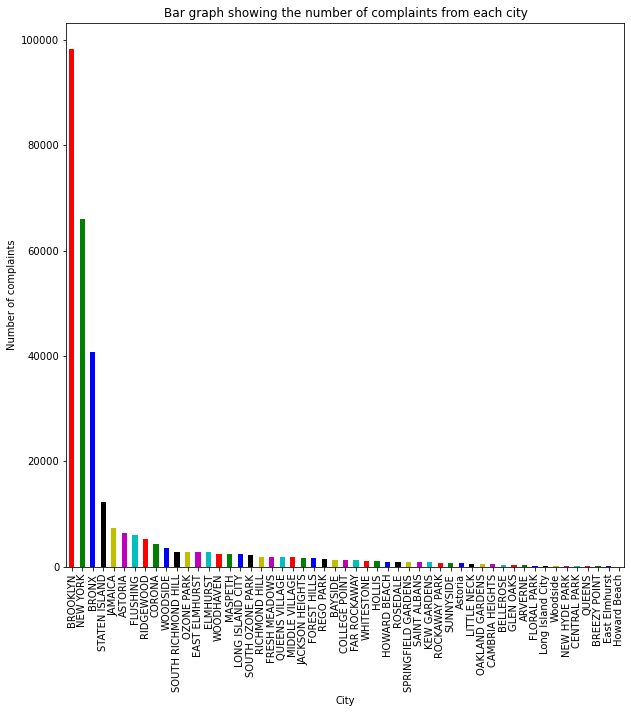

In [64]:
#Plot showing city wise complaint count
City_count.plot(kind='bar',color=list('rgbkymc'),alpha=1,figsize=(10,10))
plt.xlabel("City")
plt.ylabel("Number of complaints")
plt.title("Bar graph showing the number of complaints from each city")
plt.show()

In [65]:
#Location type wise count
LocationType_count= nyc_data['Location Type'].value_counts()
LocationType_count

Street/Sidewalk               249299
Store/Commercial               20381
Club/Bar/Restaurant            17360
Residential Building/House      6960
Park/Playground                 4773
House of Worship                 929
Residential Building             227
Highway                          215
Parking Lot                      117
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    35
Subway Station                    34
Bridge                             2
Terminal                           1
Ferry                              1
Park                               1
Name: Location Type, dtype: int64

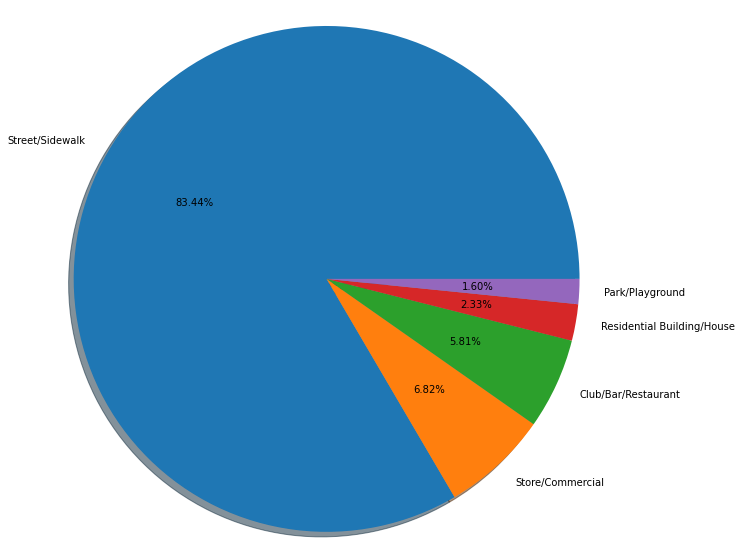

In [66]:
# Pie chart of Different Location Type

plt.figure(figsize=(10,10))
labels = LocationType_count.head().keys()
sizes = LocationType_count.head()
plt.pie(sizes,labels=labels,shadow=True,autopct='%1.2f%%') 
plt.axis('equal')
plt.show()

Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations. 
 


In [67]:
#checking data type 
nyc_data['Created Date'].dtype

dtype('<M8[ns]')

In [68]:
nyc_data['Closed Date'].dtype

dtype('<M8[ns]')

In [69]:
nyc_data['Request_Closing_Time'].dtype

dtype('<m8[ns]')

In [70]:
#check maximum Request_Closing_Time
nyc_data['Request_Closing_Time'].max()

Timedelta('24 days 16:52:22')

In [71]:
nyc_data['Request_Closing_Time_s']=nyc_data['Request_Closing_Time'].dt.total_seconds()
nyc_data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_Time_s
188102,31043792,2015-07-11 00:25:00,2015-07-11 01:39:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11692.0,105 BEACH 61 STREET,...,NaN,NaN,NaN,NaN,NaN,40.589981,-73.790313,"(40.58998074407277, -73.79031328313127)",01:14:00,4440.0
36387,32060971,2015-11-24 16:46:24,2015-11-24 18:07:11,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Traffic,Street/Sidewalk,11692.0,611 BEACH 63 STREET,...,NaN,NaN,NaN,NaN,NaN,40.597632,-73.792799,"(40.597632284913324, -73.79279910458949)",01:20:47,4847.0
293989,30335122,2015-04-06 00:10:00,2015-04-06 00:44:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11692.0,136 BEACH 61 STREET,...,NaN,NaN,NaN,NaN,NaN,40.590263,-73.790320,"(40.59026347080242, -73.79031959642684)",00:34:00,2040.0
248469,30661494,2015-05-20 06:21:47,2015-05-20 07:29:18,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,11692.0,315 BEACH 74 STREET,...,NaN,NaN,NaN,NaN,NaN,40.591193,-73.802303,"(40.59119324423995, -73.80230302565026)",01:07:31,4051.0
100832,31611044,2015-09-25 08:12:27,2015-09-25 09:20:18,NYPD,New York City Police Department,Animal Abuse,Tortured,Residential Building/House,11692.0,342 BEACH 56 STREET,...,NaN,NaN,NaN,NaN,NaN,40.593574,-73.786122,"(40.59357420610759, -73.78612156933204)",01:07:51,4071.0


In [72]:
nyc_data['Request_Closing_Time_s'].max()


2134342.0

In [73]:
nyc_data['Request_Closing_Time_s'].dtype

dtype('float64')

In [74]:
nyc_data['Request_Closing_Time_Hr']= round(nyc_data['Request_Closing_Time_s']/3600,3)
nyc_data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_Time_s,Request_Closing_Time_Hr
188102,31043792,2015-07-11 00:25:00,2015-07-11 01:39:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11692.0,105 BEACH 61 STREET,...,NaN,NaN,NaN,NaN,40.589981,-73.790313,"(40.58998074407277, -73.79031328313127)",01:14:00,4440.0,1.233
36387,32060971,2015-11-24 16:46:24,2015-11-24 18:07:11,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Traffic,Street/Sidewalk,11692.0,611 BEACH 63 STREET,...,NaN,NaN,NaN,NaN,40.597632,-73.792799,"(40.597632284913324, -73.79279910458949)",01:20:47,4847.0,1.346
293989,30335122,2015-04-06 00:10:00,2015-04-06 00:44:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11692.0,136 BEACH 61 STREET,...,NaN,NaN,NaN,NaN,40.590263,-73.790320,"(40.59026347080242, -73.79031959642684)",00:34:00,2040.0,0.567
248469,30661494,2015-05-20 06:21:47,2015-05-20 07:29:18,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,11692.0,315 BEACH 74 STREET,...,NaN,NaN,NaN,NaN,40.591193,-73.802303,"(40.59119324423995, -73.80230302565026)",01:07:31,4051.0,1.125
100832,31611044,2015-09-25 08:12:27,2015-09-25 09:20:18,NYPD,New York City Police Department,Animal Abuse,Tortured,Residential Building/House,11692.0,342 BEACH 56 STREET,...,NaN,NaN,NaN,NaN,40.593574,-73.786122,"(40.59357420610759, -73.78612156933204)",01:07:51,4071.0,1.131


In [75]:
# to get mean Request_Closing_Time for various complaint types
Complaint_type_mean_time=nyc_data.groupby(['City','Complaint Type']).agg({'Request_Closing_Time_Hr': ['mean']})
Complaint_type_mean_time

Request_Closing_Time_Hr
                                                    mean
City     Complaint Type                                 
ARVERNE  Animal Abuse                           2.153553
         Blocked Driveway                       2.526000
         Derelict Vehicle                       2.968148
         Disorderly Youth                       3.591500
         Drinking                               0.239000
...                                                  ...
Woodside Blocked Driveway                       6.406182
         Derelict Vehicle                       4.966500
         Illegal Parking                        5.219230
         Noise - Commercial                     2.394000
         Noise - Street/Sidewalk                3.411400

[764 rows x 1 columns]

Statistical Test

In [76]:
# Statistical Test1:Average response time across complaint time is same or not
# Ho= Average response time across complaint type is same
# Ha= Average response time across complaint type is not same

In [77]:
nyc_data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_Time_s,Request_Closing_Time_Hr
188102,31043792,2015-07-11 00:25:00,2015-07-11 01:39:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11692.0,105 BEACH 61 STREET,...,NaN,NaN,NaN,NaN,40.589981,-73.790313,"(40.58998074407277, -73.79031328313127)",01:14:00,4440.0,1.233
36387,32060971,2015-11-24 16:46:24,2015-11-24 18:07:11,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Traffic,Street/Sidewalk,11692.0,611 BEACH 63 STREET,...,NaN,NaN,NaN,NaN,40.597632,-73.792799,"(40.597632284913324, -73.79279910458949)",01:20:47,4847.0,1.346
293989,30335122,2015-04-06 00:10:00,2015-04-06 00:44:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11692.0,136 BEACH 61 STREET,...,NaN,NaN,NaN,NaN,40.590263,-73.790320,"(40.59026347080242, -73.79031959642684)",00:34:00,2040.0,0.567
248469,30661494,2015-05-20 06:21:47,2015-05-20 07:29:18,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,11692.0,315 BEACH 74 STREET,...,NaN,NaN,NaN,NaN,40.591193,-73.802303,"(40.59119324423995, -73.80230302565026)",01:07:31,4051.0,1.125
100832,31611044,2015-09-25 08:12:27,2015-09-25 09:20:18,NYPD,New York City Police Department,Animal Abuse,Tortured,Residential Building/House,11692.0,342 BEACH 56 STREET,...,NaN,NaN,NaN,NaN,40.593574,-73.786122,"(40.59357420610759, -73.78612156933204)",01:07:51,4071.0,1.131


In [78]:
#to get omplaint types counts
nyc_data['Complaint Type'].value_counts()


Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

In [79]:
# removing NaN values in City and Request_Closing_Time_Hr
nyc_data.dropna(subset=['Request_Closing_Time_Hr','City'],inplace=True)

In [80]:
nyc_data[['Complaint Type','Request_Closing_Time_Hr','City']].isnull().sum()

Complaint Type             0
Request_Closing_Time_Hr    0
City                       0
dtype: int64

In [81]:
#Using f statistic for hypothesis testing
#sample1
nyc_data_s1=nyc_data[nyc_data['Complaint Type']=='Blocked Driveway']['Request_Closing_Time_Hr']

nyc_data_s1.head()

293989    0.567
133607    0.296
112962    1.466
62069     2.580
245036    1.957
Name: Request_Closing_Time_Hr, dtype: float64

In [82]:
#sample2
nyc_data_s2=nyc_data[nyc_data['Complaint Type']=='Illegal Parking']['Request_Closing_Time_Hr']
nyc_data_s2.head()


188102    1.233
36387     1.346
68856     2.416
12544     1.434
159369    1.283
Name: Request_Closing_Time_Hr, dtype: float64

In [83]:
#sample3
nyc_data_s3=nyc_data[nyc_data['Complaint Type']=='Noise - Street/Sidewalk']['Request_Closing_Time_Hr']
nyc_data_s3.head()

126885    1.600
212988    1.469
125195    1.900
207673    2.600
117242    3.650
Name: Request_Closing_Time_Hr, dtype: float64

In [84]:
#sample4
nyc_data_s4=nyc_data[nyc_data['Complaint Type']=='Noise - Vehicle']['Request_Closing_Time_Hr']
nyc_data_s4.head()

258477    0.967
80278     0.579
213880    3.181
45649     1.417
166689    5.059
Name: Request_Closing_Time_Hr, dtype: float64

In [85]:
#sample5
nyc_data_s5=nyc_data[nyc_data['Complaint Type']=='Traffic']['Request_Closing_Time_Hr']
nyc_data_s5.head()

278350    1.992
88693     9.300
148276    4.081
263766    4.317
96639     5.902
Name: Request_Closing_Time_Hr, dtype: float64

In [86]:
st.f_oneway(nyc_data_s1,nyc_data_s2,nyc_data_s3,nyc_data_s4,nyc_data_s5)

F_onewayResult(statistic=514.4419024729458, pvalue=0.0)

Here P value is 0.0 , p< alpha, so we reject null Hypothesis and accept alternate hypothesis that 
average reponse time is not same for different complaint types

In [87]:
#statistical Test 2 :Are type of complaint or service requested  and location related
# Ho= Type of complaint or service requested  and location are related 
# Ha= Type of complaint or service requested  and location are not related 


In [88]:
nyc_data[['Complaint Type','City']].isnull().sum()

Complaint Type    0
City              0
dtype: int64

In [89]:
#creating cross tab of Complaint Type and City
nyc_data_table=pd.crosstab(nyc_data['Complaint Type'],nyc_data['City'])
nyc_data_table

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,...,SAINT ALBANS,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Animal Abuse,38,125,0,37,7,2,1415,2394,11,0,...,30,55,26,24,557,35,28,45,69,0
Animal in a Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bike/Roller/Skate Chronic,0,15,0,0,1,0,20,111,0,0,...,0,1,1,0,7,2,4,2,4,0
Blocked Driveway,35,2618,116,377,95,3,12754,28147,147,0,...,244,942,1548,262,2142,206,208,1059,1613,11
Derelict Vehicle,27,351,12,198,89,3,1952,5179,115,0,...,202,358,289,210,1766,10,227,308,247,2
Disorderly Youth,2,3,0,1,2,0,63,72,0,0,...,1,2,2,0,23,2,1,0,1,0
Drinking,1,35,0,1,1,1,188,257,0,0,...,3,13,23,6,175,10,2,3,15,0
Graffiti,1,4,0,3,0,0,9,43,0,0,...,0,0,0,0,2,1,1,0,3,0
Homeless Encampment,4,32,0,2,1,0,247,857,5,0,...,8,4,11,5,71,11,0,9,33,0


In [90]:
# Chi-square test
chi_val,p_value,df,expected_val= st.chi2_contingency(nyc_data_table)
print("chi_val=", chi_val)
print("p_value=", p_value)
print("degrees of freedom=", df)
print("Expected values=", expected_val)

chi_val= 119737.34755994167
p_value= 0.0
degrees of freedom= 1092
Expected values= [[5.73348813e+00 1.64968090e+02 1.86598977e+01 ... 6.41890057e+01
  9.23612815e+01 3.12735716e+00]
 [7.38185674e-04 2.12396151e-02 2.40245883e-03 ... 8.26432416e-03
  1.18915001e-02 4.02646731e-04]
 [3.11514354e-01 8.96311756e+00 1.01383763e+00 ... 3.48754479e+00
  5.01821305e+00 1.69916921e-01]
 ...
 [3.31740642e+00 9.54508301e+01 1.07966500e+01 ... 3.71398728e+01
  5.34404016e+01 1.80949441e+00]
 [4.37005919e-01 1.25738521e+01 1.42225563e+00 ... 4.89247990e+00
  7.03976808e+00 2.38366865e-01]
 [2.80067645e+00 8.05830996e+01 9.11492880e+00 ... 3.13548459e+01
  4.51163515e+01 1.52764170e+00]]


Here p value is 0.0 , so p<alpha(0.05).Therefore we reject the null hypothesis and 
accept alternate hypothesis that complaint type and Location are not related